https://dacon.io/competitions/official/235980/codeshare/6556


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import warnings

# statsmodels
from statsmodels.tsa import stattools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

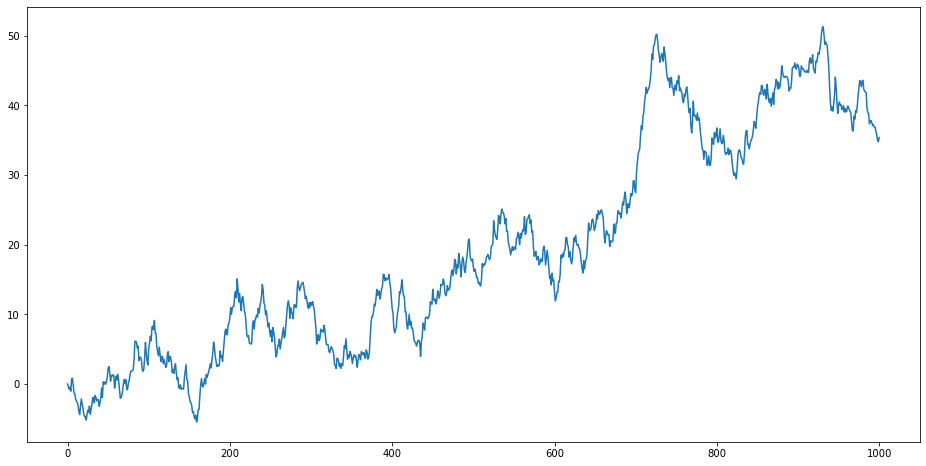

In [3]:
# example 표준정규분포를 따르는 랜덤 워크 프로세스 샘플 만들기

plt.figure(figsize=(16, 8))
y = [0] 
for i in range(1000):
    y.append(y[i] + np.random.normal(0, 1)) # y_t = y_{t - 1} + epsilon_t
    
plt.plot(y)

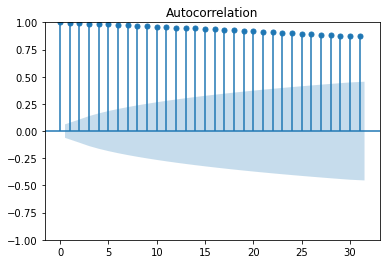

In [4]:
# acf 그리기
y = pd.Series(y)
plot_acf(y)
plt.show()

<AxesSubplot:>

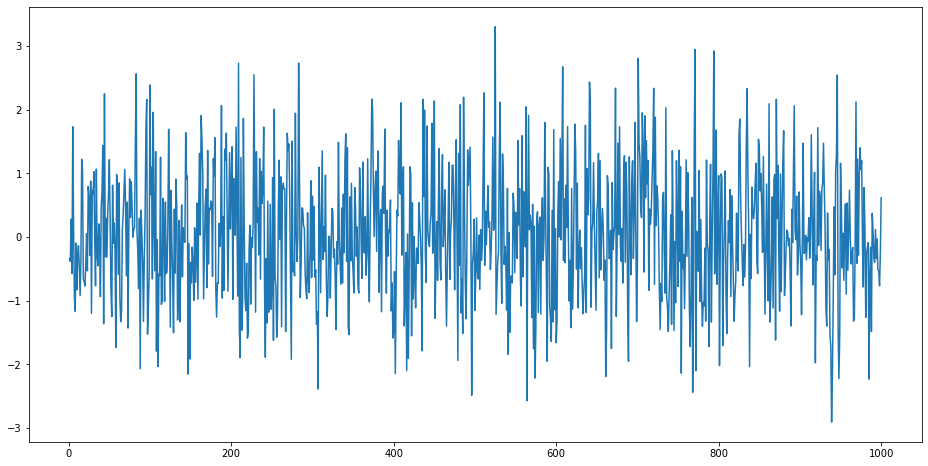

In [10]:
# 정상성을 위해 차분 진행
plt.figure(figsize=(16, 8))
y_diff = y.diff(1)[1:]
y_diff.plot()

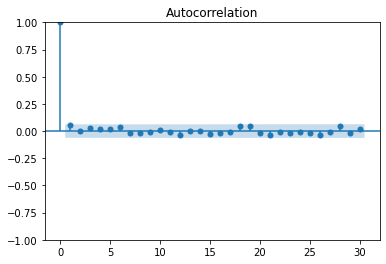

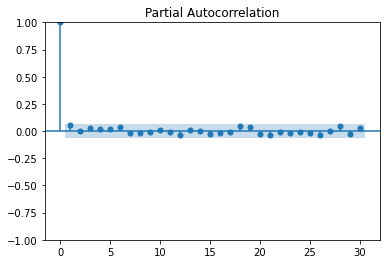

In [11]:
# pacf 그리기
plot_acf(y_diff)
plot_pacf(y_diff, method = 'ywm')
plt.show()

In [12]:
# 코스피 분석하기

kospi = pd.read_csv("data/kospi_data.csv")
kospi

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099


In [13]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024 entries, 0 to 11023
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11024 non-null  object 
 1   Close   11024 non-null  float64
 2   Open    11024 non-null  float64
 3   High    11024 non-null  float64
 4   Low     11024 non-null  float64
 5   Volume  11024 non-null  float64
 6   Change  11024 non-null  float64
dtypes: float64(6), object(1)
memory usage: 603.0+ KB


In [15]:
round(kospi.describe(), 2)

,Close,Open,High,Low,Volume,Change
count,11024.00,11024.00,11024.00,11024.00,1.102400e+04,11024.00
mean,1121.08,1121.55,1127.45,1114.37,2.556932e+08,0.00
std,772.89,773.39,777.13,768.31,2.938432e+08,0.01
min,105.99,105.99,105.99,105.99,1.660000e+05,-0.12
25%,586.56,586.48,589.73,582.84,1.208750e+07,-0.01
50%,878.10,878.02,882.36,873.43,2.264900e+08,0.00
75%,1891.35,1892.09,1902.32,1880.64,4.028000e+08,0.01
max,3305.21,3305.46,3316.08,3295.44,3.460000e+09,0.12


In [16]:
kospi.Date = pd.to_datetime(kospi.Date)
kospi = kospi.set_index('Date')
endog = kospi.Close

In [17]:
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


<AxesSubplot:xlabel='Date'>

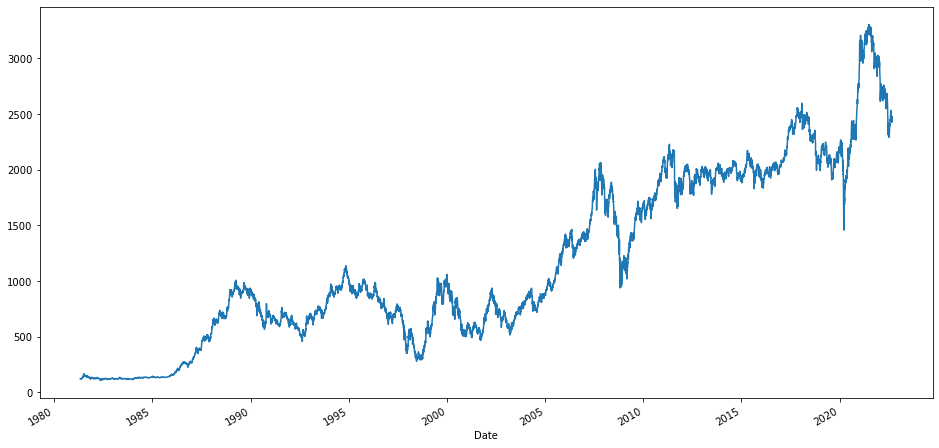

In [18]:
plt.figure(figsize=(16, 8))
endog.plot()

<AxesSubplot:xlabel='Date'>

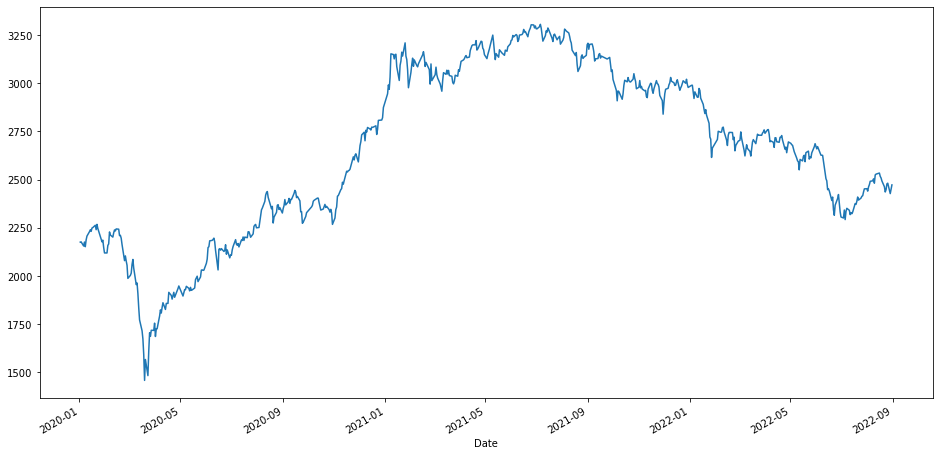

In [19]:
plt.figure(figsize=(16,8))
endog = endog[endog.index > '2020-01-01']
endog.plot()

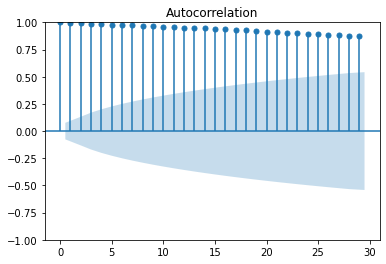

In [20]:
# 정상성 검증
plot_acf(endog)
plt.show()

<AxesSubplot:xlabel='Date'>

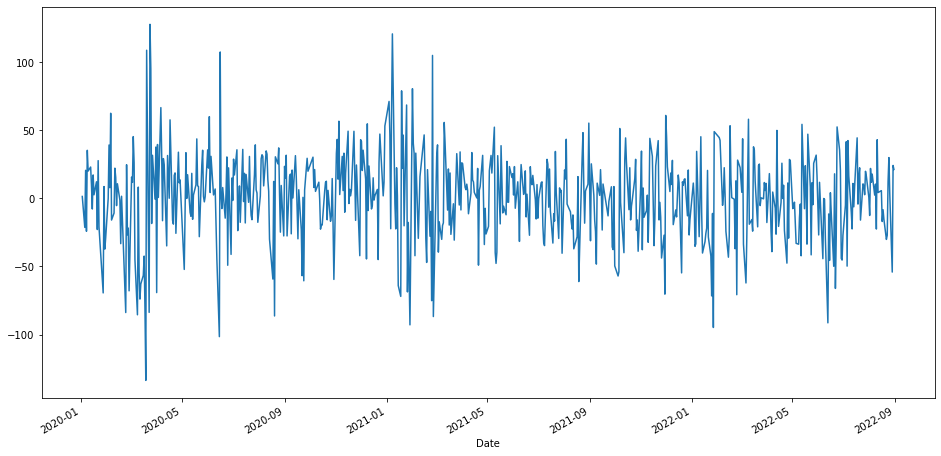

In [24]:
# 차분 진행
plt.figure(figsize=(16, 8))
endog_diff = endog.diff(1)[1:]
endog_diff.plot()

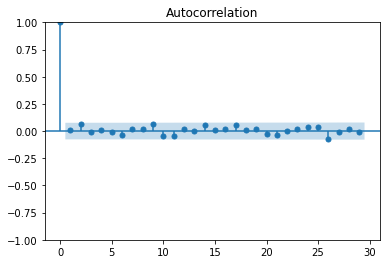

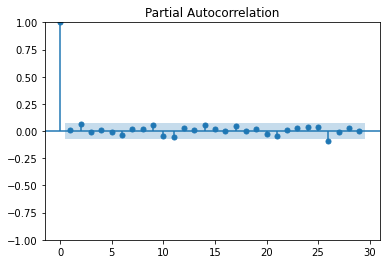

In [25]:
# acf, pacf 

plot_acf(endog_diff)
plot_pacf(endog_diff, method='ywm')
plt.show()

In [28]:
warnings.filterwarnings('ignore')
model = ARIMA(endog=endog, order=(0, 2, 0))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  660
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -3445.541
Date:                Mon, 30 Jan 2023   AIC                           6893.082
Time:                        20:06:38   BIC                           6897.571
Sample:                             0   HQIC                          6894.822
                                - 660                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2069.1524     68.633     30.148      0.000    1934.634    2203.670
===================================================================================
Ljung-Box (L1) (Q):                 182.57   Jarque-Bera (JB):               386.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

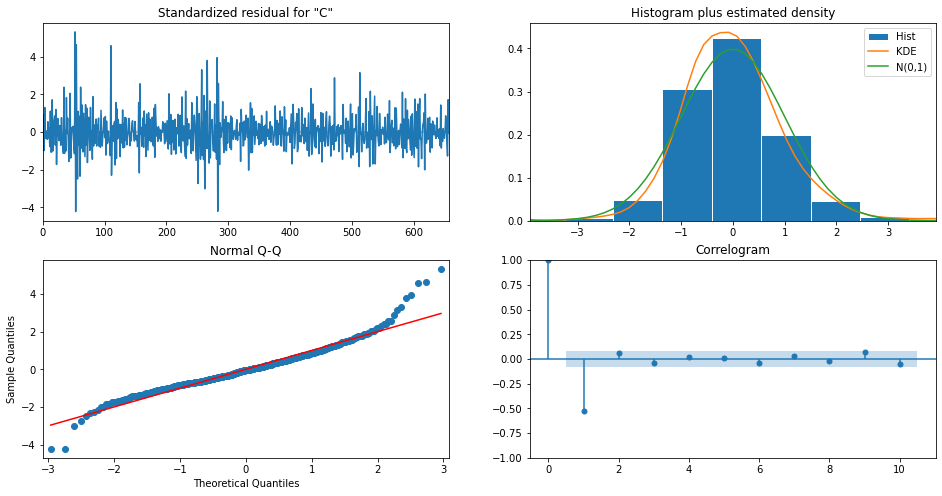

In [29]:
model.fit().plot_diagnostics(figsize=(16, 8))
plt.show()